## <center> **Market Basket Analysis for Retail Cross-Selling Opportunities in a Dynamic Environment**
<center><em>Providing a Retail Business with a strategy which helps improve their product sales, inventory management, and customer retention, which in turn would improve the profitability of the business.</em></center>

<br>
<center><img src="https://miro.medium.com/max/2880/1*DHfQvlMVBaJCHpYmj1kmCw.png" width=600/></center>

***Project Developer:*** Bipin Shrestha <br>
***Project Supervisor:*** Dr Farzaneh Farhadi <br>

### **Project Introduction**

***Project Proposition:***
This project aims to perform market basket analysis (MBA) to identify potential cross-selling opportunities by analysing retail transactional data in a dynamic environment. The focus is on discovering frequent item combinations purchased together and suggesting strategies for product bundling and promotions that encourage customers to buy related products. The project will explore and utilize various state-of-the-art algorithms, including popular association rule mining techniques, machine learning, deep learning algorithms, and other data mining methods, and potentially develop a novel solution by combining the strengths of these existing techniques. A significant aspect of the project involves implementing these analyses in a dynamic or real-time environment. In real-life settings, customers' purchasing preferences may change over time based on factors like price fluctuations, the introduction of new products, and product reviews. Existing algorithms typically perform a one-time analysis and cannot adapt to such changes. The goal of this project is to conduct MBA on data as it is received over time, developing a model that can adapt to these evolving conditions.


***Methodology:*** Data Mining, Machine Learninig, Analysis and Visualization of Retail Sales Data.<br>
1. Market Basket Analysis (MBA), which aims to find relationship and establishing patterns within the retail sales data. <br>
2. Product Recomendations and Bundling (people who bought this also bought)


The analysis will be implemented using the Online Retail dataset by Daqing Chen from the UCI Machine Learning Repository [1].

[1] Chen, Daqing. (2015). Online Retail. UCI Machine Learning Repository. https://doi.org/10.24432/C5BW33


### **Data Collection**


In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, HTML

import calendar
import datetime as dt

import re

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

import textwrap
import pprint
import random

In [2]:
def print_formatted_message(message):
    """
    Prints a message with hyphens above and below, matching the text length.

    Args:
        message (str): The message to display.
    """
    line_length = len(message)  # Match line length to message length

    # Wrap the text (not strictly necessary if not expecting very long messages)
    wrapped_text = textwrap.fill(message, width=line_length)

    print("\n")  # Line break before
    print("-" * line_length)
    print(wrapped_text)
    print("-" * line_length)
    print("\n")  # Line break after

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
#import the data into a pandas dataframe via URL
def data_loading(path):
    """
    This function reads the Excel data file from UCI Machinelearning repository
    The data is stored into a pandas dataframe that the fuction returns
    """
    df = pd.read_excel(path)
    return df

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

df = data_loading(data_url)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Display basic information about the dataset
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**General Information About the Data** <br>
This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. <br>

The dataset "Online Retail" consists of 541,909 rows and 8 columns, with the following structure: <br>

<center><img src="https://github.com/bipinnp/Dissertation/blob/7f57e824e56ce8d466bc6d87a22bf54e61abeaba/RetailDatasetVars.png?raw=1" width=600/></center>


**Information about the Attributes/Columns in the Dataset** <br>

***InvoiceNo:*** Invoice number. (non-null, object),
 Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. <br>

***StockCode:*** Product (item) code. (non-null, object), Nominal, a 5-digit integral number uniquely assigned to each distinct product. <br>

***Description:*** Product (item) name. (non-null, object), Nominal. <br>

***Quantity:*** The quantities of each product (item) per transaction. (non-null, int64), Numeric.<br>

***InvoiceDate:*** Invoice Date and time. (non-null, datetime64), Numeric, the day and time when each transaction was generated. <br>

***UnitPrice:*** Unit price. (non-null, float64), Numeric, Product price per unit in sterling.<br>

***CustomerID:*** Customer number. ( non-null, float64), Nominal, a 5-digit integral number uniquely assigned to each customer. <br>

***Country:*** Country name. (non-null, object), Nominal, the name of the country where each customer resides. <br>

### **Data Exploration, Cleaning and Preparation**

First, some of the descriptions have spaces that need to be removed. The invoice numbers starting with C are actually credit/canceled transactions , so those kind of instances can also be removed.

In [5]:
#remove spaces from descriptions
df['Description'] = df['Description'].str.strip()

#Convert the InvoiceNo column to string
df["InvoiceNo"] = df["InvoiceNo"].astype('str')

# Count rows with InvoiceNo starting with "C" before filtering
cancelled_invoices = df[df['InvoiceNo'].str.startswith('C')]
num_cancelled = len(cancelled_invoices)

# Print the number of canceled invoices
print(f"Number of canceled invoices: {num_cancelled}")

# remove rows with InvoiceNo starting with "C" and save into new dataframe df2
df2 = df.drop(cancelled_invoices.index)

# Print the DataFrame length after filtering
print(f"Number of rows before filtering: {len(df)}")
print(f"Number of rows after filtering: {len(df2)}")
print(f"Dataset shape for df2 after filtering: {df2.shape}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of canceled invoices: 9288
Number of rows before filtering: 541909
Number of rows after filtering: 532621
Dataset shape for df2 after filtering: (532621, 8)


**While analysing the dataset df2, we found that :**

**For example:**
For stock code : **84805B**,	in one row, its description is 'wet damaged' , unit price = 0. <br>
For same stock code in other row, its description is  'BLUE CLIMBING HYDRANGA ART FLOWER', unit price > 0 <br>
Hence,for this stock code, the actual correct description is BLUE CLIMBING HYDRANGA ART FLOWER.

Similar pattern is found in other stock codes as well.

Based on this, it can be seen that there are stock codes having more than one description but the vaild description is only one among them. Hence, it is assumed that the stock code and description mapping should be created keeping in mind the unit price of stock when it is greater than 0 because almost all the valid stock code descriptions are present for such instances of data.

**More examples for furthur elaboration as below:**

<center><img src="https://github.com/bipinnp/Dissertation/blob/2d22ba609cc65aa4f597110f9634b76437279383/st1.png?raw=1" width=600/></center>

<br>

<center><img src="https://github.com/bipinnp/Dissertation/blob/2d22ba609cc65aa4f597110f9634b76437279383/st2.png?raw=1" width=600/></center>

<br>

<center><img src="https://github.com/bipinnp/Dissertation/blob/2d22ba609cc65aa4f597110f9634b76437279383/st3.png?raw=1" width=600/></center>

**Some more  stock code and descritpions found in original dataset which are explored and analysed:**

POST	POSTAGE <br>
C2	CARRIAGE <br>
DOT	DOTCOM POSTAGE <br>
M	Manual <br>
BANK CHARGES	Bank Charges <br>
21275	?   > ZINC TOP  2 DOOR WOODEN SHELF <br>
84968E	check  > SET OF 16 VINTAGE BLACK CUTLERY <br>
AMAZONFEE	AMAZON FEE <br>

DCGS0076	SUNJAR LED NIGHT NIGHT LIGHT <br>
DCGS0069	OOH LA LA DOGS COLLAR <br>

gift_0001_40	Dotcomgiftshop Gift Voucher £40.00 (associated with lots of inovoices) <br>
gift_0001_50	Dotcomgiftshop Gift Voucher £50.00(associated with lots of inovoices) <br>
gift_0001_10	Dotcomgiftshop Gift Voucher £10.00 <br>

m	Manual <br>
72038P	damages ( only 1 row) <br>

22351	Given away (some value in row this) > DOTCOMGIFTSHOP TEA TOWEL (some value in row this) > quantity value negative if value is given away <br>
84611B	thrown away > negative quantity, unit price 0, custID null <br>
84611B	null descritpion > positive quantity, unit price 0, custID null <br>

84612B	thrown away > negative quantity, unit price 0, custID null  <br>

72759	thrown away-can't sell. > negative quantity, unit price 0, custID null <br>
72732	thrown away-can't sell > negative quantity, unit price 0, custID null  <br>

S	SAMPLES > mostly associated with canceled txns <br>

23200	mailout > JUMBO BAG PEARS > positive quantity, unit price 0, custID null <br>
23202	mailout > JUMBO BAG VINTAGE LEAF > positive quantity, unit price 0, custID null <br>
23203	mailout > JUMBO BAG DOILEY PATTERNS > positive quantity, unit price 0, custID null <br>
23209	mailout > LUNCH BAG DOILEY PATTERN > positive quantity, unit price 0, custID null <br>

23059	Thrown away-rusty > negative quantity, unit price 0, custID null > only 1 row <br>

23444	Next Day Carriage <br>

84805B	wet damaged > BLUE CLIMBING HYDRANGA ART FLOWER <br>
23113	Damaged > PANTRY CHOPPING BOARD<br>

23114	Damaged
23115	Damaged
23116	Damaged
23117	Damaged

<br>

DCGS0073	ebay
DCGS0068	ebay
DCGS0067	ebay

<br>

22016	Dotcomgiftshop Gift Voucher £100.00 <br>

B	Adjust bad debt <br>
35598C	found<br>
3702	High Resolution Image <br>
23595	adjustment <br>
35600A	Found by jackie <br>

79323G	Unsaleable, destroyed.
79323GR	Unsaleable, destroyed.
79323LP	Unsaleable, destroyed.
79323S	Unsaleable, destroyed.
79323W	Unsaleable, destroyed.
79341	Unsaleable, destroyed.
79342B	Unsaleable, destroyed.

<br>


84613A thrown away (actual value: PINK NEW BAROQUE FLOCK CANDLESTICK)> negative quantity, unit price 0, custID null  <br>


35611B	thrown away > > negative quantity, unit price 0, custID null <br>

84613C null descritpion (actual value: BLUE NEW BAROQUE FLOCK CANDLESTICK)
 > negative quantity, unit price 0, custID null <br>

84614A thrown away > negative quantity, unit price 0, custID null <br>

72140F	throw away > negative quantity, unit price 0, custID null <br>

20893 damages/display  > negative quantity, unit price 0, custID null <br>
21815 ? > negative quantity, unit price 0, custID null <br>

84988 ? > positive quantity, unit price 0, custID null <br>

21527 damages > > negative quantity, unit price 0, custID null <br>

79302M null description > positive quantity, unit price 0, custID null <br>

40016 damaged stock > > negative quantity, unit price 0, custID null <br>

21537 ?  > negative quantity, unit price 0, custID null <br>

20752 null description > negative quantity, unit price 0, custID null <br>

21320 broken > negative quantity, unit price 0, custID null <br>

85049D ? > negative quantity, unit price 0, custID null <br>

20866 ? > negative quantity, unit price 0, custID null <br>

21503 null description >negative quantity, unit price 0, custID null <br>
21504 null description >negative quantity, unit price 0, custID null <br>

**Action to be taken from insights above:** <br>

As per the insights gained from the above study of dataset,
- It is ideal to remove all instances with negative unit quantities, as they do not make sense for the analysis.
- Additionally, zero unit prices can be considered as missing prices, so it would be better to remove these instances as well. <br>
- After handling negative quantity and zero unit price instances, the instances should be removed which contain description values ( as found from above analysis) but those values does not make sense as the name of actual product, instead they represent transactions that would not be necessary for our MBA analysis.

Here is list of such product descriptions:

DOTCOM POSTAGE,
POSTAGE,
CARRIAGE,
Manual,
Bank Charges,
Dotcomgiftshop Gift Voucher £40.00,
Dotcomgiftshop Gift Voucher £50.00,
Dotcomgiftshop Gift Voucher £30.00,
Dotcomgiftshop Gift Voucher £20.00,
Dotcomgiftshop Gift Voucher £10.00,
Dotcomgiftshop Gift Voucher £100.00,
SAMPLES,
Next Day Carriage,
PACKING CHARGE,
Adjust bad debt,
AMAZON FEE,
High Resolution Image,
damages,
damages/display,
damaged stock,
given away,
thrown away,
thrown away-can't sell,
Thrown away-rusty,
mailout,
broken,
wet damaged,
damaged,
ebay,
found,
adjustment,
Found by Jackie,
Unsaleable, destroyed,
?


- Regarding the invoices with just one item, while it is often sensible to remove them for market basket analysis, it is preferrable to keep them in the dataset. They can provide valuable insights into customer behavior, such as identifying items that are frequently purchased alone. However, to make a more informed decision, further analyssis of  the size of the dataset and the impact assessment is needed if we remove the single-item invoices.


In [6]:
# Filter for rows with negative quantity
rows_with_negative_quantity = df2[df2['Quantity'] < 0]

# Print the filtered DataFrame
print(len(rows_with_negative_quantity))
rows_with_negative_quantity

1336


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


There are **1336 instances with each item purchase having negative unit quantity** and these are removed from the df2.

In [7]:
# Drop rows with negative quantities from df2
df2 = df2.drop(rows_with_negative_quantity.index)

# Print the DataFrame length after dropping
print(f"Number of rows after dropping: {len(df2)}")
print(f"Dataset shape for df2 after dropping: {df2.shape}")

Number of rows after dropping: 531285
Dataset shape for df2 after dropping: (531285, 8)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Now, let's check the instances for the zero unit prices from df2.

In [8]:
# Filter for rows with zero unit price
rows_with_zero_unit_price = df2[df2['UnitPrice'] == 0]

# Print the number of filtered rows (optional for analysis)
print(f"Number of rows with zero unit price: {len(rows_with_zero_unit_price)}")
rows_with_zero_unit_price

Number of rows with zero unit price: 1179


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535334,581211,22142,check,14,2011-12-07 18:36:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom


There are **1179 instances of zero unit prices** in the current dataset. Now These instances are removed as discussed from the above insights.

In [9]:
# Drop rows with zero unit price from df2
df2 = df2.drop(rows_with_zero_unit_price.index)

# Print the DataFrame length and shape after dropping
print(f"Number of rows after dropping: {len(df2)}")
print(f"Dataset shape for df2 after dropping: {df2.shape}")

Number of rows after dropping: 530106
Dataset shape for df2 after dropping: (530106, 8)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Handling instances with useless descriptions**

In [10]:
#find unique list of descriptions
unique_descriptions = df2['Description'].unique()
print(unique_descriptions.size)

# Save to a text file
np.savetxt('unique_descriptions.txt', unique_descriptions, fmt='%s')

4015


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
#check if the unique descriptions match with useless descriptions
unique_descriptions = df2['Description'].str.lower().unique()

descriptions_to_check = [
    "dotcom postage",
    "postage",
    "carriage",
    "manual",
    "bank charges",
    "dotcomgiftshop gift voucher £40.00",
    "dotcomgiftshop gift voucher £50.00",
    "dotcomgiftshop gift voucher £30.00",
    "dotcomgiftshop gift voucher £20.00",
    "dotcomgiftshop gift voucher £10.00",
    "dotcomgiftshop gift voucher £100.00",
    "samples",
    "next day carriage",
    "packing charge",
    "adjust bad debt",
    "amazon fee",
    "damages",
    "damages/display",
    "damaged stock",
    "given away",
    "thrown away",
    "thrown away-can't sell",
    "thrown away-rusty",
    "mailout",
    "broken",
    "wet damaged",
    "damaged",
    "ebay",
    "found",
    "high resolution image",
    "adjustment",
    "found by jackie",
    "unsaleable, destroyed",
    "?"
]

matched_descriptions = []

for desc in descriptions_to_check:
    if desc in unique_descriptions:
        matched_descriptions.append(desc)
#print matched descriptions
print(matched_descriptions)

['dotcom postage', 'postage', 'carriage', 'manual', 'bank charges', 'dotcomgiftshop gift voucher £40.00', 'dotcomgiftshop gift voucher £50.00', 'dotcomgiftshop gift voucher £30.00', 'dotcomgiftshop gift voucher £20.00', 'dotcomgiftshop gift voucher £10.00', 'dotcomgiftshop gift voucher £100.00', 'samples', 'next day carriage', 'packing charge', 'adjust bad debt', 'amazon fee', 'high resolution image']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Create an empty DataFrame to store the results
result_df2 = pd.DataFrame(columns=['Description to check', 'Number of rows'])

# Filter rows based on matched descriptions and count occurrences
for desc in matched_descriptions:
    mask = df2['Description'].str.lower() == desc
    count = mask.sum()
    temp_df2 = pd.DataFrame({'Description to check': [desc], 'Number of rows': [count]})
    result_df2 = pd.concat([result_df2, temp_df2], ignore_index=True)

# Print total count of rows with matching descriptions
total_count = result_df2['Number of rows'].sum()
print("Total count of rows with matching descriptions:", total_count)
print(result_df2)

# Filter rows from df2 based on matching descriptions
rows_with_matching_desc = df2[df2['Description'].str.lower().isin(matched_descriptions)]

# Drop rows from df2 based on matching descriptions
df2 = df2.drop(rows_with_matching_desc.index)

print(df2.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total count of rows with matching descriptions: 2442
                   Description to check Number of rows
0                        dotcom postage            706
1                               postage           1126
2                              carriage            141
3                                manual            322
4                          bank charges             12
5    dotcomgiftshop gift voucher £40.00              3
6    dotcomgiftshop gift voucher £50.00              4
7    dotcomgiftshop gift voucher £30.00              7
8    dotcomgiftshop gift voucher £20.00              9
9    dotcomgiftshop gift voucher £10.00              8
10  dotcomgiftshop gift voucher £100.00              1
11                              samples              2
12                    next day carriage             79
13                       packing charge             14
14                      adjust bad debt              3
15                           amazon fee              2
16          

Now, lets check for the single-item invoices in the dataset to analyse and assess the impact if we decide to remove them.

In [13]:
# Group by InvoiceNo and filter for groups with size 1
single_item_invoices = df2.groupby('InvoiceNo').filter(lambda x: len(x) == 1)

# Print single-item invoices DataFrame
print(len(single_item_invoices))
single_item_invoices

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1496


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom
105,536380,22961,JAM MAKING SET PRINTED,24,2010-12-01 09:41:00,1.45,17809.0,United Kingdom
252,536393,22180,RETROSPOT LAMP,8,2010-12-01 10:37:00,9.95,13747.0,United Kingdom
...,...,...,...,...,...,...,...,...
540389,581479,22087,PAPER BUNTING WHITE LACE,10,2011-12-09 09:00:00,2.95,17364.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540442,581487,21137,BLACK RECORD COVER FRAME,120,2011-12-09 09:44:00,3.39,15694.0,United Kingdom
540450,581491,23571,TRADITIONAL NAUGHTS & CROSSES,12,2011-12-09 10:02:00,1.65,12433.0,Norway


As seen from the above result, there are **1496 instances of single item invoices**, which is not a significant amount considering the dataset size.

Whether to keep or remove them will be decide later. [note: decide after algorithm implementation impact]

In [ ]:
# Remove single-item invoices (uncomment)
# df2 = df2.drop(single_item_invoices.index)

**Check if all above data cleaning has been successfully completed?**

In [14]:
# Count rows with InvoiceNo starting with "C" before filtering
cancelled_invoices = df2[df2['InvoiceNo'].str.startswith('C')]
print("cancelled_invoices:", len(cancelled_invoices))

# Count rows with negative quantity
rows_with_negative_quantity = df2[df2['Quantity'] < 0]
print("rows_with_negative_quantity: ", len(rows_with_negative_quantity))

# Count rows with zero unit price
rows_with_zero_unit_price = df2[df2['UnitPrice'] == 0]
print("rows_with_zero_unit_price: ", len(rows_with_zero_unit_price))

# Count rows based on matching descriptions
rows_with_matching_desc = df2[df2['Description'].str.lower().isin(matched_descriptions)]
print("rows_with_matching_desc: ", len(rows_with_matching_desc))

# Count rows with single item invoices
single_item_invoices = df2.groupby('InvoiceNo').filter(lambda x: len(x) == 1)
print("single_item_invoices: ", len(single_item_invoices))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


cancelled_invoices: 0
rows_with_negative_quantity:  0
rows_with_zero_unit_price:  0
rows_with_matching_desc:  0
single_item_invoices:  1496


Data cleaning till now is successful.

**Checking missing values:** <br>
Next, the occurrence of missing/null values in the dataset in each column  is checked.

In [15]:
# Count the missing values in each column and calculate the percentage of missing values
missing_values = df2.isnull().sum()
missing_percentage = (missing_values / len(df2)) * 100

# Create a DataFrame to display the missing values and their percentages
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

             Missing Values  Percentage
InvoiceNo                 0    0.000000
StockCode                 0    0.000000
Description               0    0.000000
Quantity                  0    0.000000
InvoiceDate               0    0.000000
UnitPrice                 0    0.000000
CustomerID           131420   24.906001
Country                   0    0.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


From the above, we can see that the **CustomerID** column has missing/null values, having 131420 null values.

To handle these missing values, instead of removing them at once, we will implement the following steps so that missing data is handled in a better way.

**Handle Missing Values in CustomerID Column in the Dataset** <br>

After above steps, the dataframe **df2** will be used for further analysis.

In [16]:
print("Shape of the original dataset:", df.shape)
print("After removing canceled transactions, negative quantity, zero unit prices and matched description transaction rows:")
print("Shape of the current dataset: ", df2.shape)

print("Cleaned number of data rows till now: ", len(df) - len(df2))

Shape of the original dataset: (541909, 8)
After removing canceled transactions, negative quantity, zero unit prices and matched description transaction rows:
Shape of the current dataset:  (527664, 8)
Cleaned number of data rows till now:  14245


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Save the cleaned dataset instances to a new Excel and CSV file
df2_file_path = 'Online_Retail_Cleaned_Df2.xlsx'
df2.to_excel(df2_file_path, index=False)
#df2.to_csv ('Online_Retail_Dfc.csv', index = False, header=True)

In [17]:
#create separate dataframe to analyse the missing customer IDs
df3 = df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Convert InvoiceDate to datetime and extract the week and year
df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])
df3['WeekYear'] = df3['InvoiceDate'].dt.to_period('W').astype(str)

# Create a column to indicate whether CustomerID is missing
df3['CustomerID_missing'] = df3['CustomerID'].isna()

# Group by WeekYear and calculate the proportion of missing CustomerID
missing_by_weekly = df3.groupby('WeekYear')['CustomerID_missing'].mean().reset_index()

# Plot the distribution of missing CustomerID values over time (weekly) using Plotly Express
fig = px.line(missing_by_weekly,
              x='WeekYear',
              y='CustomerID_missing',
              markers=True,
              title='Proportion of Missing CustomerID Values Over Time (Weekly)',
              labels={'WeekYear': 'Invoice Date (Weekly)',
                      'CustomerID_missing': 'Proportion of Missing CustomerID'})

fig.update_layout(
    xaxis_title='Invoice Date (Weekly)',
    yaxis_title='Proportion of Missing CustomerID',
    xaxis_tickangle=45,
    height=600,
    width=1000,
    template='plotly_white'
)

# Show the plot
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Interpretation of Weekly Graph** <br>

**Key Observations:** <br>

**High Proportion of Missing Values in Early Weeks:** There is a noticeable spike in the proportion of missing CustomerID values in the initial weeks. This suggests that during these weeks, a significant number of transactions were recorded without a CustomerID.

**Fluctuating Trend:** The proportion of missing CustomerID fluctuates over the weeks, indicating variability in how consistently CustomerID was recorded. There are several peaks and valleys, which could correspond to different periods of operational practices or data entry methods.

**Decreasing Trend with Occasional Spikes:** After the initial few weeks, there’s a general downward trend in the proportion of missing CustomerID values. However, there are occasional spikes, which might indicate specific weeks where CustomerID recording practices were less rigorous.

**End of the Series:** Towards the end of the time series, there’s a slight increase, which might indicate a relaxation in the data recording process or an increase in transactions where CustomerID was not required.

**Possible Explanations:**<br>

**Guest Checkouts:** Since this data is related to an e-commerce platform, the higher proportion of missing CustomerID could correspond to periods where more customers opted to checkout as guests, not providing their customer information.


In [19]:
# Convert InvoiceDate to datetime and extract the week and year
df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])
df3['WeekYear'] = df3['InvoiceDate'].dt.to_period('W').astype(str)

# Create a column to indicate whether CustomerID is missing
df3['CustomerID_missing'] = df3['CustomerID'].isna()

# Group by WeekYear to calculate the proportion of missing CustomerID and the total number of transactions
weekly_summary = df3.groupby('WeekYear').agg(
    missing_proportion=('CustomerID_missing', 'mean'),
    total_transactions=('InvoiceNo', 'count')
).reset_index()

# Create a dual-axis plot with Plotly
fig = go.Figure()

# Add trace for the proportion of missing CustomerID
fig.add_trace(
    go.Scatter(
        x=weekly_summary['WeekYear'],
        y=weekly_summary['missing_proportion'],
        mode='lines+markers',
        name='Proportion of Missing CustomerID',
        yaxis='y1'
    )
)

# Add trace for the total number of transactions
fig.add_trace(
    go.Bar(
        x=weekly_summary['WeekYear'],
        y=weekly_summary['total_transactions'],
        name='Total Transactions',
        yaxis='y2',
        opacity=0.6
    )
)

# Update the layout to include two y-axes
fig.update_layout(
    title='Proportion of Missing CustomerID and Total Transactions Over Time (Weekly)',
    xaxis=dict(title='Invoice Date (Weekly)', tickangle=45),
    yaxis=dict(title='Proportion of Missing CustomerID', side='left', range=[0, 1]),
    yaxis2=dict(title='Total Transactions', side='right', overlaying='y', range=[0, weekly_summary['total_transactions'].max()]),
    legend=dict(x=0.1, y=0.9),
    height=600,
    width=1000,
    template='plotly_white'
)

# Show the figure
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



**Key Observations from Overlay with Total Transactions:** <br>
Inverse Relationship: In some periods, there appears to be an inverse relationship between the proportion of missing CustomerID values and total transactions. For instance, when total transactions spike, the proportion of missing CustomerID values often drops, and vice versa. <br>
High Transaction Periods: Towards the end of the observed period, both the total transactions and the proportion of missing CustomerID values rise, indicating a possible change in data collection practices or an influx of orders that might not require customer identification. <br>
Seasonal Trends: The fluctuations might also indicate seasonal trends where customer information is either more diligently recorded or ignored due to high order volumes. <br>

In [20]:
# Convert InvoiceDate to datetime and extract the week and year
df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])
df3['WeekYear'] = df3['InvoiceDate'].dt.to_period('W').astype(str)

# Create a column to indicate whether CustomerID is missing
df3['CustomerID_missing'] = df3['CustomerID'].isna()

# Group by WeekYear and Country to calculate the proportion of missing CustomerID
missing_by_weekly_country = df3.groupby(['WeekYear', 'Country']).agg(
    missing_proportion=('CustomerID_missing', 'mean')
).reset_index()

# Filter out countries with no missing CustomerID
countries_with_missing = missing_by_weekly_country.groupby('Country')['missing_proportion'].sum()
countries_with_missing = countries_with_missing[countries_with_missing > 0].index

# Create a plot for each country with missing CustomerIDs
for country in countries_with_missing:
    country_data = missing_by_weekly_country[missing_by_weekly_country['Country'] == country]

    # Generate the faceted line chart for each country
    fig = px.line(country_data,
                  x='WeekYear',
                  y='missing_proportion',
                  title=f'Proportion of Missing CustomerID Values Over Time (Weekly) - {country}',
                  labels={'WeekYear': 'Invoice Date (Weekly)',
                          'missing_proportion': 'Proportion of Missing CustomerID'},
                  height=400,
                  width=800)

    fig.update_layout(xaxis_tickangle=45)
    fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



A country-wise analysis graph is provided, offering insights into the proportion of missing CustomerID values across different countries over time. The United Kingdom shows a consistently higher proportion of missing CustomerID values, averaging around 25% with fluctuations throughout the year. In Ireland, the proportion of missing CustomerID values is also notable, with peaks reaching around 90% at certain points. Countries like France, Portugal, Israel, Bahrain, and Switzerland experience infrequent spikes in missing CustomerID values. Many other countries, including Australia, Belgium, Finland, and the USA, display minimal or no missing CustomerID values, while some, such as Norway, Malta, and Portugal, show a minimal presence. For the 'Unspecified' category, significant spikes reaching 100% in missing CustomerID values are noted, possibly indicating unrecorded country information.

These findings suggest potential differences in data collection practices. The United Kingdom and Ireland may have transaction types that frequently omit CustomerID information, likely due to wholesale transactions, promotional sales, or bulk purchases where customer tracking is less emphasized. Certain regions, including unspecified ones, consistently show missing CustomerID values, which might indicate unique transaction types or data recording practices. To ensure accurate analysis, especially for Market Basket Analysis (MBA) or other customer-related studies, segmenting data by regions with significant and minimal missing values is recommended. Furthermore, there might be correlations between missing CustomerID values and particular sales or promotional periods, suggesting a need for improved data recording during high-transaction times.

It is sensible to investigate why high proportions of missing CustomerID values appear in the United Kingdom, Ireland, and unspecified regions. Segmenting data by regions with high and low missing CustomerID values can enhance the accuracy of analyses, especially for MBA.

In [21]:
# Group by InvoiceNo to calculate the proportion of missing CustomerID and other metrics
invoice_analysis = df3.groupby('InvoiceNo').agg(
    missing_customerID_proportion=('CustomerID_missing', 'mean'),
    total_amount=('UnitPrice', 'sum'),
    total_quantity=('Quantity', 'sum'),
    num_items=('StockCode', 'count')
)

# Compare invoices with and without missing CustomerID
with_customer_id = invoice_analysis[invoice_analysis['missing_customerID_proportion'] == 0]
without_customer_id = invoice_analysis[invoice_analysis['missing_customerID_proportion'] > 0]

# Summary statistics for comparison
summary_with_customer_id = with_customer_id.describe()
summary_without_customer_id = without_customer_id.describe()

print("Invoices with CustomerID:")
print(summary_with_customer_id)
print("\nInvoices without CustomerID:")
print(summary_without_customer_id)


Invoices with CustomerID:
       missing_customerID_proportion  total_amount  total_quantity  \
count                        18399.0  18399.000000    18399.000000   
mean                             0.0     61.712701      280.301103   
std                              0.0     78.920011      975.575524   
min                              0.0      0.040000        1.000000   
25%                              0.0     17.520000       76.000000   
50%                              0.0     42.250000      156.000000   
75%                              0.0     80.850000      292.000000   
max                              0.0   2402.750000    80995.000000   

          num_items  
count  18399.000000  
mean      21.536170  
std       24.930086  
min        1.000000  
25%        7.000000  
50%       15.000000  
75%       28.000000  
max      541.000000  

Invoices without CustomerID:
       missing_customerID_proportion  total_amount  total_quantity  \
count                         1371.0   1371.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



**Interpretation of Invoice-Level Analysis Results**

**1. Missing CustomerID Proportion**

- **Invoices with CustomerID:** The missing_customerID_proportion is 0 across all statistics, as expected, because these invoices have a CustomerID.
- **Invoices without CustomerID:** The missing_customerID_proportion is 1 across all statistics, indicating that these invoices lack a CustomerID.

**2. Total Amount (total_amount)**

- **Invoices with CustomerID:**

 Mean: The average total amount per invoice is approximately £61.71.

 Median (50%): The median total amount is £42.25, indicating that half of the invoices have a total amount below this value.

 Max: The maximum total amount for a single invoice is £2402.75.

- **Invoices without CustomerID:**

  Mean: The average total amount per invoice is significantly higher at approximately £427.78.

  Median (50%): The median total amount is £209.86, suggesting that these invoices generally have higher transaction values.

  Max: The maximum total amount is £4995.64, which is more than double the maximum amount seen in invoices with a CustomerID.

**3. Total Quantity (total_quantity)**

- **Invoices with CustomerID:**

  Mean: The average total quantity per invoice is 280.30 items.

  Median (50%): The median total quantity is 156 items.

  Max: The maximum total quantity is 80995 items, indicating some very large orders.

- **Invoices without CustomerID:**

  Mean: The average total quantity per invoice is slightly higher at 306.16 items.

  Median (50%): The median total quantity is 82 items, which is lower than invoices with a CustomerID.

  Max: The maximum total quantity is 14149 items, which is significantly lower than the maximum seen in invoices with a CustomerID.

**4. Number of Items (num_items)**

- Invoices with CustomerID:

  Mean: The average number of distinct items per invoice is 21.54.

  Median (50%): The median is 15 items.

  Max: The maximum number of distinct items on a single invoice is 541.

- Invoices without CustomerID:

  Mean: The average number of distinct items per invoice is significantly higher at 95.86.

  Median (50%): The median is 38 items.

  Max: The maximum number of distinct items on a single invoice is 1112.

**Interpretation and Insights:**

**Higher Transaction Values Without CustomerID:** Invoices without a CustomerID tend to have significantly higher transaction amounts on average, as well as higher maximum transaction amounts. This could indicate that some large, possibly wholesale or special orders are being processed without linking them to a specific customer account.

**Larger and More Complex Orders Without CustomerID:** Invoices without a CustomerID also show a higher average number of distinct items and larger quantities in the orders. This suggests that these might be bulk orders or special transactions where customer details were not recorded, perhaps due to the nature of the transaction (e.g., guest checkouts, bulk orders,special cases).

**More Consistency in Orders with CustomerID:** Invoices with a CustomerID show less variability in total amounts and quantities, indicating a more consistent pattern of smaller, regular orders compared to those without CustomerID.



**Recommendations**
* Separate Analysis for Different Invoice Types: Perform separate analyses for invoices with and without CustomerID to account for the different transaction behaviors and ensure accurate insights.
* Imputation of Missing Values: Consider using predictive models to impute missing CustomerID values based on other transaction attributes, which can help in maintaining data integrity for analysis.



**Final Insights from analyis of missing customerIDs**

The missing customer IDs mostly are seen due to the transactions which are different than normal like guest customer sales, bulk orders and other special case sales.

S0 either we can keep the customer IDs as it is or impute them.

For sake of our analysis we will impute them based on following strategy.

**Identify the invoice groups with missing customer IDs**

In [22]:
# Create a column to indicate whether CustomerID is missing
df2['CustomerID_missing'] = df2['CustomerID'].isna()

# Group by InvoiceNo
grouped = df2.groupby('InvoiceNo')

# Initialize lists to keep track of invoice groups
invoice_groups_with_missing_ids = []
invoice_groups_with_at_least_one_id = []
invoice_groups_with_no_id = []

# Iterate through each group
for name, group in grouped:
    if group['CustomerID_missing'].any():
        invoice_groups_with_missing_ids.append(name)
        if group['CustomerID'].notna().any():
            invoice_groups_with_at_least_one_id.append(name)
        else:
            invoice_groups_with_no_id.append(name)

# Count of each type of group
count_with_missing_ids = len(invoice_groups_with_missing_ids)
count_with_at_least_one_id = len(invoice_groups_with_at_least_one_id)
count_with_no_id = len(invoice_groups_with_no_id)

print("Total invoice groups with missing CustomerID:", count_with_missing_ids)
print("Invoice groups with at least one CustomerID:", count_with_at_least_one_id)
print("Invoice groups with no CustomerID:", count_with_no_id)

# Display first few examples of each type
print("Examples of invoice groups with missing CustomerID:", invoice_groups_with_missing_ids[:5])
print("Examples of invoice groups with at least one CustomerID:", invoice_groups_with_at_least_one_id[:5])
print("Examples of invoice groups with no CustomerID:", invoice_groups_with_no_id[:5])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Total invoice groups with missing CustomerID: 1371
Invoice groups with at least one CustomerID: 0
Invoice groups with no CustomerID: 1371
Examples of invoice groups with missing CustomerID: ['536544', '536555', '536558', '536565', '536592']
Examples of invoice groups with at least one CustomerID: []
Examples of invoice groups with no CustomerID: ['536544', '536555', '536558', '536565', '536592']


**Imputating missing Customer IDs**

The strategy for imputing the missing CustomerID values involves grouping the data by invoice number and then filling in missing CustomerID values either by using an existing CustomerID from the same invoice group or by generating a new unique CustomerID when none is present. Here is a step-by-step implementation plan:

Group the Data by Invoice Number:
* Iterate through each group (invoice number) in the dataset.

Check for Missing CustomerID:
* For each group, check if any rows are missing the CustomerID.

Impute CustomerID:
* If any row in the group has a valid CustomerID, fill this CustomerID for all missing values in that group.
* If no rows in the group have a CustomerID, generate a new unique CustomerID and assign it to all rows in the group.

Ensure Uniqueness:
* Maintain a set of all used CustomerID values to ensure that any generated CustomerID is unique.

In [23]:
# Create a set to keep track of all unique CustomerIDs
existing_customer_ids = set(df2['CustomerID'].dropna().unique())

# Function to generate a unique CustomerID
def generate_unique_customer_id(existing_ids):
    while True:
      new_id = np.random.randint(10000, 99999)  # 5-digit IDs random id generator
      if new_id not in existing_ids:
          existing_ids.add(new_id)
          return new_id

# Group the dataframe by InvoiceNo
grouped = df2.groupby('InvoiceNo')

# Iterate through each group
for name, group in grouped:
    if group['CustomerID'].isna().any():
        if group['CustomerID'].notna().any():
            # If any row in the group has a valid CustomerID, fill it for all rows
            valid_customer_id = group['CustomerID'].dropna().iloc[0]
            df2.loc[group.index, 'CustomerID'] = valid_customer_id
        else:
            # Generate a new unique CustomerID and assign it to all rows in the group
            new_customer_id = generate_unique_customer_id(existing_customer_ids)
            df2.loc[group.index, 'CustomerID'] = new_customer_id

# Check the results
print(df2['CustomerID'].isna().sum())  # Should be 0
print(df2.shape)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0
(527664, 10)


In [24]:
# Function to check if a specific invoice group has been imputed correctly
def check_imputation(invoice_no, df):
    group = df2[df2['InvoiceNo'] == invoice_no]
    return group[['InvoiceNo', 'CustomerID']]

# Check if the invoice group '536544' has been imputed correctly
invoice_no_to_check = '536544'
imputation_check_result = check_imputation(invoice_no_to_check, df)

# Display the result
imputation_check_result


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,InvoiceNo,CustomerID
1443,536544,98060.0
1444,536544,98060.0
1445,536544,98060.0
1446,536544,98060.0
1447,536544,98060.0
...,...,...
1965,536544,98060.0
1966,536544,98060.0
1967,536544,98060.0
1968,536544,98060.0


In [26]:
df2.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekYear,CustomerID_missing
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-11-29/2010-12-05,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-11-29/2010-12-05,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-11-29/2010-12-05,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-11-29/2010-12-05,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-11-29/2010-12-05,False
...,...,...,...,...,...,...,...,...,...,...
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom,2010-11-29/2010-12-05,False
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom,2010-11-29/2010-12-05,False
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom,2010-11-29/2010-12-05,False
99,536378,84991,60 TEATIME FAIRY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom,2010-11-29/2010-12-05,False


As can be seen from above output, there are no any missing values present and after cleaning the data, we are left with 527664 instances.


Now, the 'Invoice Date' column  is splitted into just Date (without the time), Time, Month, Day, Week, Day of the Week, Hour, Time of Day (which is either Morning, Afternoon or Evening). These are need to separate the transactions at different periods.

In [25]:
#Assign df2 to new dataframe df4 for further analysis
df4 = df2

######*****InvoiceDate column******###########

df4['Date'] = df4['InvoiceDate'].dt.date
df4['Month'] = df4['InvoiceDate'].dt.month
df4['Year'] = df4['InvoiceDate'].dt.year
#we change the number month to the actual name of the month
df4['Month'] = df4['Month'].apply(lambda x: calendar.month_name[int(x)])
df4['Week of the Year'] = df4['InvoiceDate'].dt.isocalendar().week
#we will add the day of the week to the dataframe
df4['Day of Week'] = df4['InvoiceDate'].dt.day_name()
df4['Time'] = df4['InvoiceDate'].dt.time
df4["Hour"] = df4['InvoiceDate'].dt.hour
df4['Time of Day']=pd.cut(df4['InvoiceDate'].dt.hour,[0,6,12,18,23],labels=['Night','Morning','Afternoon','Evening'],include_lowest=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Also, "Sales Income" column is created to know the revenue earned for each purchase of items from the basket.

In [26]:
#####*****Sales Income column******##########
#create a column 'SalesIncome' = 'Quantity' multiplied by 'UnitPrice'
df4['SalesIncome'] = df4['UnitPrice'] * df4['Quantity']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [27]:
#Remove unwanted columns
columns_to_remove = ['WeekYear', 'CustomerID_missing']
df4 = df4.drop(columns=columns_to_remove)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [28]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527664 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         527664 non-null  object        
 1   StockCode         527664 non-null  object        
 2   Description       527664 non-null  object        
 3   Quantity          527664 non-null  int64         
 4   InvoiceDate       527664 non-null  datetime64[ns]
 5   UnitPrice         527664 non-null  float64       
 6   CustomerID        527664 non-null  float64       
 7   Country           527664 non-null  object        
 8   Date              527664 non-null  object        
 9   Month             527664 non-null  object        
 10  Year              527664 non-null  int32         
 11  Week of the Year  527664 non-null  UInt32        
 12  Day of Week       527664 non-null  object        
 13  Time              527664 non-null  object        
 14  Hour     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [34]:
df4.shape

(527664, 17)

In [35]:
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Year,Week of the Year,Day of Week,Time,Hour,Time of Day,SalesIncome
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,December,2010,48,Wednesday,08:26:00,8,Morning,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,December,2010,48,Wednesday,08:26:00,8,Morning,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,December,2010,48,Wednesday,08:26:00,8,Morning,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,December,2010,48,Wednesday,08:26:00,8,Morning,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,December,2010,48,Wednesday,08:26:00,8,Morning,20.34


 Finally, after cleaning and transforming the data, 527664 instances and 17 columns are remained.

### **Exploratory Data Analysis *(EDA)***

* Exploratory data analysis is an approach/practice of analysing data sets to summarise their main characteristics, often using analysis, statistical graphics and other data visualisation.

EDA is performed to discover patterns, detect outliers and anomalies, and gain some new, hidden, insights into the data.

A helper function is constructed that will aggregate the quantity and sales income by 'CustomerID', 'Country', 'Date', 'Month', 'Week of the Year', 'Day of Week', 'Hour', or 'Time of Day'.

In [29]:
def group_Quantity_and_SalesIncome(df,string):
    """
    This function inputs the main data frame and feature name
    The feature name is the column name that you want to group the Quantity and Sales Income
    """

    df = df[[f'{string}','Quantity','SalesIncome']].groupby([f'{string}']).sum().sort_values(by= 'SalesIncome', ascending = False).reset_index()

    return df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [30]:
df4_country = df4.groupby("Country")["InvoiceNo"].nunique().sort_values(ascending = False).reset_index().head(10)
fig = px.bar(df4_country, x= "InvoiceNo", y='Country', title= "Top 10 Orders per country")
#fig.show(renderer='png', height=700, width=1000)
fig.show( height=700, width=1000)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The above graph indicates that the UK has a significantly higher number of orders (17.5k+) compared to Germany (442), France (382), and EIRE (282).
It can start possing question of why this is the case, especially when this is a Online retail store.

This suggests:

**Market Dominance:** The UK represents a larger market for your product or service compared to the other mentioned countries. <br>
**Potential for Growth:** While the UK is a strong market, Germany, France, and Eire still offer opportunities for growth and expansion. <br>
**Customer Behavior:** There might be differences in purchasing habits or preferences between the UK and the other countries.

We can take a look at how the countries fare up with regards to the Quantity sold and Sales Income.The first plot is going to be for Quantity sold and the second will be for Sales Income both for the whole year of 2011.

In [31]:
temp_df4 = group_Quantity_and_SalesIncome(df4,'Country')

fig = px.bar(temp_df4, x= "Quantity", y='Country', title= "Quantity of orders per country")
#fig.show(renderer='png', height=700, width=1000)
fig.show(height=1000, width=1400)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Just as expected, the UK has high volumes of Quantitly sold and the below charts should show that the UK has high sales as well. However, unlike the number of invoices, the Netherlands has the second highest volume of Quantity sold at approximately 200K.

In [32]:
temp_df4 = group_Quantity_and_SalesIncome(df4,'Country')
fig = px.bar(temp_df4, x= "SalesIncome", y='Country', title= "Sales Income of orders per country")
#fig.show(renderer='png', height=700, width=1000)
fig.show( height=700, width=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The sales revenue of Netherlands and
EIRE is quite close.

 Now products are analysed, which ones have high Quantity sold, or which product has high Sales Revenue. Also, word cloud will be implemented.

In [33]:
def wordcloud_of_Description(df, title):
    """
    This fuction creates a word cloud
    inputs a data frame converts it to tuples and uses the input 'title' as the title of the word cloud
    """
    plt.rcParams["figure.figsize"] = (10,15)
    tuples = [tuple(x) for x in df.values]
    wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()


def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



**A word cloud of the Product Descriptions per Quantity**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



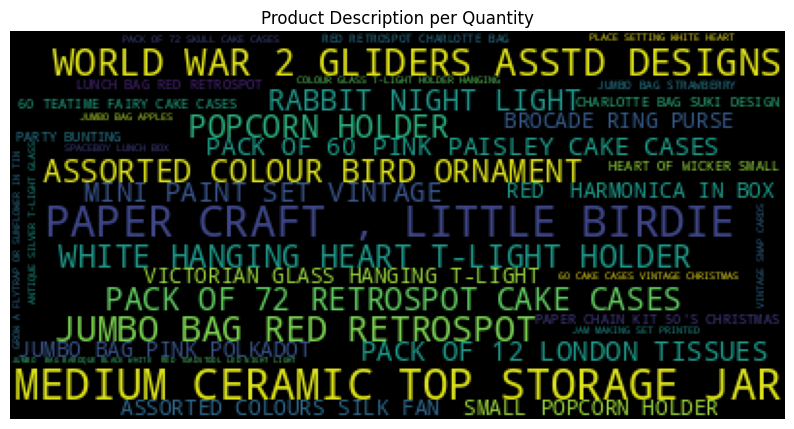

In [34]:
temp_df4 = pd.DataFrame(df4.groupby('Description')['Quantity'].sum()).reset_index()
title = "Product Description per Quantity"
wordcloud_of_Description(temp_df4, title)

**A word cloud of the Product Descriptions per Sales Income**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



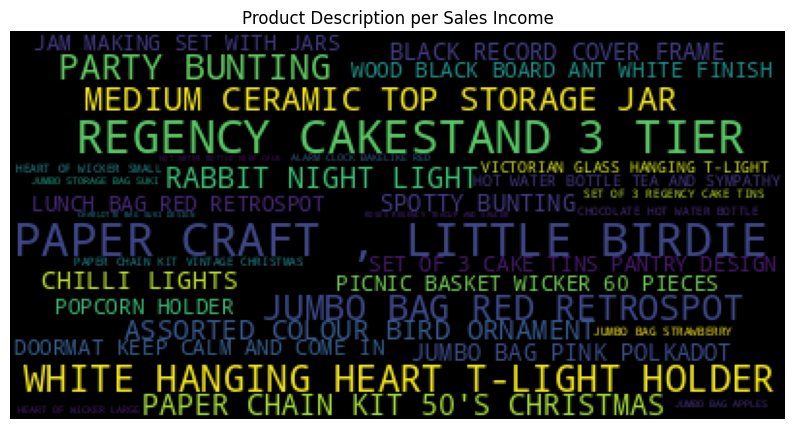

In [35]:
temp_df4 = pd.DataFrame(df4.groupby('Description')['SalesIncome'].sum()).reset_index()
title = "Product Description per Sales Income"
wordcloud_of_Description(temp_df4, title)

#### ***Monthly Stats***

Below are the monthly analysis of the Sales and the Quantity of items sold

In [36]:
temp_df4 = group_Quantity_and_SalesIncome(df4,'Month')
fig = make_subplots(rows=1, cols=2, shared_yaxes=False,
                  subplot_titles=("Quantity", "SalesIncome")
                  )

fig.add_trace(go.Bar(x=temp_df4['Month'], y=temp_df4['Quantity'],name = 'Quantity'),1, 1)

fig.add_trace(go.Bar(x=temp_df4['Month'], y=temp_df4['SalesIncome'],name = 'SalesIncome'),1, 2)

fig.update_layout(showlegend=False, title_text="Monthly Sales Income and Quantity")
#fig.show(renderer='png', height=700, width=1200)
fig.show( height=700, width=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The above graphs show the monthly trend of Quantity of products ordered(left) and Sales Revenue(right). Both the measures were the highest in Novemember folllowed by December and October.

In [37]:
fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=("Quantity per Month", "Sales Income per Month")
                    )

fig.add_trace(
    go.Pie(values = temp_df4['Quantity'], labels = temp_df4['Month'],
    name = 'Quantity'),
    row=1, col=1
)
fig.add_trace(
    go.Pie(values = temp_df4['SalesIncome'], labels = temp_df4['Month'],
    name = 'SalesIncome'),
    row=1, col=2
)
fig.update_layout(title_text="Percentage pie charts for Monthly Sales Income and Quantity")

#fig.show(renderer='png', height=700, width=1200)
fig.show( height=700, width=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The above pie charts depicts the quantity of products ordered and sales income per month with highest in the month of November with 13.4% (quantity) and 14.2% (sales income), and lowest in the month of february with 5.08% (quantity) and 4.96% (sales income).

#### ***Weekly Stats***

The below are the weekly analysis of the Sales and the Quantity of items sold.

In [38]:
temp_df4 = group_Quantity_and_SalesIncome(df4,'Week of the Year')
fig = make_subplots(rows=1, cols=2, shared_yaxes=False,
                  subplot_titles=("Quantity", "SalesIncome")
                        )

fig.add_trace(go.Bar(x=temp_df4['Week of the Year'], y=temp_df4['Quantity'],name = 'Quantity'),1, 1)

fig.add_trace(go.Bar(x=temp_df4['Week of the Year'], y=temp_df4['SalesIncome'],name = 'SalesIncome'),1, 2)

fig.update_layout(showlegend=False, title_text="Weekly Sales Income and Quantity")
#fig.show(renderer='png', height=700, width=1200)
fig.show( height=700, width=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The above graphs shows the weekly trend of sales income and the quantity of products ordered. The highest peak was on the 49th week in the month of November. As it's a holiday season, there was a high demand for the decoration items. As the quantity increases, sales income also increases.

#### ***Daily Stats***

The below are the daily analysis of the Sales and the Quantity of items sold.

In [39]:
temp_df4 = group_Quantity_and_SalesIncome(df4,'Day of Week')
fig = make_subplots(rows=1, cols=2, shared_yaxes=False,
                  subplot_titles=("Quantity", "SalesIncome")
                        )

fig.add_trace(go.Bar(x=temp_df4['Day of Week'], y=temp_df4['Quantity'],name = 'Quantity'),1, 1)

fig.add_trace(go.Bar(x=temp_df4['Day of Week'], y=temp_df4['SalesIncome'],name = 'SalesIncome'),1, 2)

fig.update_layout(coloraxis=dict(colorscale='Greys'), showlegend=False, title_text="Day of the Week Sales Income and Quantity")
#fig.show(renderer='png', height=700, width=1200)
fig.show( height=700, width=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The above graphs depict the daily trend of Sales income and quantity. Thursday was observed to generate the highest quantity of products and Sales income, with Tuesday coming second.

In [40]:
fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=("Quantity", "SalesIncome")
                    )

fig.add_trace(
    go.Pie(values = temp_df4['Quantity'], labels = temp_df4['Day of Week'],
    name = 'Quantity'),
    row=1, col=1
)
fig.add_trace(
    go.Pie(values = temp_df4['SalesIncome'], labels = temp_df4['Day of Week'],
    name = 'SalesIncome'),
    row=1, col=2
)
fig.update_layout(title_text="Percentage pie charts for Day of the Week Sales Income and Quantity")

#fig.show(renderer='png', height=700, width=1200)
fig.show( height=700, width=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The above pie charts shows the daily trend of sales income and quantity of products ordered. Thursday has the highest sales income and quantity, followed closely by Tuesday.

In [41]:
temp_df4 = group_Quantity_and_SalesIncome(df4,'Time of Day')
fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=("Quantity", "SalesIncome")
                    )

fig.add_trace(
    go.Pie(values = temp_df4['Quantity'], labels = temp_df4['Time of Day'],
    name = 'Quantity'),
    row=1, col=1
)
fig.add_trace(
    go.Pie(values = temp_df4['SalesIncome'], labels = temp_df4['Time of Day'],
    name = 'SalesIncome'),
    row=1, col=2
)
fig.update_layout(title_text="Percentage pie charts for Time of Day Sales Income and Quantity")


#fig.show(renderer='png', height=700, width=1200)
fig.show( height=700, width=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-29-c3ed1efaa3f2>:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



The above piecharts shows the breakdown of Quantity of orders(left) and Sales Income(right) by time of the day.  More than 99% of the orders were placed during mornings and afternoons.

In [42]:
Hourly_Sales = df4.groupby('Hour')['Quantity'].sum().reset_index()
fig = px.bar(Hourly_Sales, x='Hour', y='Quantity', title='Hourly Volume of quantity sold')
fig.show(height=700, width=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The above graph shows that volume of quantity of products sold is higher between time period from 9 AM to 3 PM. However, the sales decline during the early morning and evening time resulting in much quieter periods.

In [43]:
#the volume quantity sold hourly data
Hourly_Sales = (df4.groupby('Hour').count()["InvoiceNo"]).reset_index()
fig = px.bar(Hourly_Sales, x='Hour', y='InvoiceNo', title='Hourly sale using the Invoice Numbers')
fig.show(height=700, width=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The graph depicts the hourly volume of sales based on invoice numbers.

**Key Observations:** <br>

**Peak Sales:** The highest sales volumes occur between hours 12 and 15. This suggests a peak sales period around midday.
<br>

**Sales Pattern:** There's a general trend of higher sales during the middle part of the day, with a decline towards the early morning and late evening hours.
<br>

**Fluctuations:** While there's an overall pattern, there are variations in sales volume between specific hours. For instance, there's a noticeable dip around hour 16.

In [44]:
# Group by CustomerID and count unique InvoiceNo
top_customers = df4.groupby("CustomerID")["InvoiceNo"].nunique().sort_values(ascending=False).reset_index().head(10)

# Create the bar plot using Plotly Express
fig = px.bar(top_customers,
             x=top_customers["CustomerID"].astype(str),
             y='InvoiceNo',
             title='Graph of Top Ten Customers by Unique Invoices',
             text='InvoiceNo',
             labels={'CustomerID': 'Customer ID', 'InvoiceNo': 'Number of Unique Invoices'},
             height=700, width=1000)


# Update layout
fig.update_layout(
    xaxis_title='Customer ID',
    yaxis_title='Number of Unique Invoices',
    title={
        'text': "Graph of Top Ten Customers by Unique Invoices",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="black"
    )
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



- Customer 12748 has the highest number of unique invoices at 206. This indicates that this customer has made the most purchases (or transactions) over the period being analysed.

- Customer 14911 follows closely with 198 unique invoices, also indicating a high level of purchasing activity.

- The distribution shows a gradual decline in the number of unique invoices from the fourth customer onward.


In [45]:
temp_df4 = group_Quantity_and_SalesIncome(df4, 'Description')
Quantity_tempA = temp_df4.sort_values(ascending=False, by = "Quantity").head(10).reset_index(drop=True)
Quantity_tempB = temp_df4.sort_values(ascending=False, by = "Quantity").tail(10).reset_index(drop=True)

Quantity_tempA.drop('SalesIncome', axis=1, inplace=True)
Quantity_tempB.drop('SalesIncome', axis=1, inplace=True)
display_side_by_side([Quantity_tempA, Quantity_tempB], ['Top 10 Description by Quantity\n', 'Bottom 10 Description by Quantity\n'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,78033
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
3,JUMBO BAG RED RETROSPOT,48474
4,WHITE HANGING HEART T-LIGHT HOLDER,37891
5,POPCORN HOLDER,36761
6,ASSORTED COLOUR BIRD ORNAMENT,36461
7,PACK OF 72 RETROSPOT CAKE CASES,36419
8,RABBIT NIGHT LIGHT,30788
9,MINI PAINT SET VINTAGE,26633


**Summary Insights:**

**Top Sellers:** The top 10 products are a mix of practical items (like storage jars and bags), decorative items (like T-light holders and ornaments), and niche products (like craft supplies). These products likely benefit from a combination of utility, design appeal, and customer demand.

**Low Sellers:** The bottom 10 products, each with only one unit sold, are either niche items, seasonal products, or possibly overlooked by customers. This could indicate a need for better marketing, repositioning, or even discontinuation if they are not profitable.

In [46]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=False,
                  subplot_titles=("Top 10 Product", "Bottom 10 Products")
                        )

fig.add_trace(go.Bar(x=Quantity_tempA['Description'], y=Quantity_tempA['Quantity'],name = 'Top10'),1, 1)

fig.add_trace(go.Bar(x=Quantity_tempB['Description'], y=Quantity_tempB['Quantity'],name = 'Bottom10'),1, 2)

fig.update_layout(showlegend=False, title_text="Product Description by Volume Quantity")
fig.show(height=700, width=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The above graphs depict the top 10 and bottom 10 products by volume quantity. The product paper craft, little birdie was the most popular item whereas there were many unpopular popular item with sales of just 1 unit.

In [47]:
Sales_Income_tempA = temp_df4.sort_values(ascending=False, by = "SalesIncome").head(10).reset_index(drop=True)
Sales_Income_tempB = temp_df4.sort_values(ascending=False, by = "SalesIncome").tail(10).reset_index(drop=True)

Sales_Income_tempA.drop('Quantity', axis=1, inplace=True)
Sales_Income_tempB.drop('Quantity', axis=1, inplace=True)
display_side_by_side([Sales_Income_tempA, Sales_Income_tempB], ['Top 10 Description by Sales Income\n', 'Bottom 10 Description by Sales Income\n'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Description,SalesIncome
0,REGENCY CAKESTAND 3 TIER,174484.740000
1,"PAPER CRAFT , LITTLE BIRDIE",168469.600000
2,WHITE HANGING HEART T-LIGHT HOLDER,106292.770000
3,PARTY BUNTING,99504.330000
4,JUMBO BAG RED RETROSPOT,94340.050000
5,MEDIUM CERAMIC TOP STORAGE JAR,81700.920000
6,RABBIT NIGHT LIGHT,66964.990000
7,PAPER CHAIN KIT 50'S CHRISTMAS,64952.290000
8,ASSORTED COLOUR BIRD ORNAMENT,59094.930000
9,CHILLI LIGHTS,54117.760000


**Summary Insights:**

**High Revenue Itemset**: The top 10 products are clearly significant revenue drivers for the business. They are a mix of decorative items, practical storage solutions, and seasonal goods, indicating that the business has strong offerings in both decor and practical homeware categories. These products are likely crucial to the company’s overall profitability.

**Low Revenue Items:** The bottom 10 products have generated extremely low revenue, suggesting that they either have little to no demand, poor marketing, or are not sufficiently differentiated from competitors. These items may require reevaluation in terms of their place in the product lineup.

In [48]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=False,
                  subplot_titles=("Top 10 Product", "Bottom 10 Products")
                        )

fig.add_trace(go.Bar(x=Sales_Income_tempA['Description'], y=Sales_Income_tempA['SalesIncome'],name = 'Top10'),1, 1)

fig.add_trace(go.Bar(x=Sales_Income_tempB['Description'], y=Sales_Income_tempB['SalesIncome'],name = 'Bottom10'),1, 2)

fig.update_layout(showlegend=False, title_text="Product Description by Sales Income")
fig.show(height=700, width=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The above graphs depict the top 10 and bottom 10 products by sales revenue. The product regency cakestand 3 tier was found to be generating the highest sales and pads had the lowest sales.

In [49]:
df4.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(527664, 17)

### **Market Basket Analysis**

In Market Basket Analysis (MBA), patterns in customer purchases are identified, often as association rules that indicate which items are commonly bought together. Key metrics used include support (frequency of itemsets), confidence (likelihood of one item appearing with another), and lift (strength of association beyond chance). These insights are used to assist in cross-selling and targeted marketing.

Two popular algorithms for MBA are Apriori and FP-Growth. Both of these algorithms are explored below to uncover and compare valuable purchasing patterns to inform retail insights, which are expected to furthur analysis of dynamic

In [50]:
MBA_df4 = df4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [51]:
#Remove unwanted columns for now
columns_to_removee = ['Country', 'Month','Year', 'Week of the Year', 'Date', 'Day of Week', 'Time','Hour', 'Time of Day']
MBA_df4 = MBA_df4.drop(columns=columns_to_removee)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [70]:
MBA_df4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,SalesIncome
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,16.60


### **Apriori Algorithm Implementation**

In [53]:
# creating basket matrix (where each row represents an invoice and each column represents a product)
# having the 'InvoiceNo' column the index, so that each row contains all the items purchased under the same invoice
basket = MBA_df4.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [54]:
basket.info()
basket.head()

<class 'pandas.core.frame.DataFrame'>
Index: 19770 entries, 536365 to 581587
Columns: 3998 entries, *Boombox Ipod Classic to ZINC WIRE SWEETHEART LETTER TRAY
dtypes: float64(3998)
memory usage: 603.2+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Convert the basket matrix to binary (1 if the product was purchased, 0 otherwise)
basket = basket.map(lambda x: 1 if x > 0 else 0)

basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Filter out single-item invoices
basket = basket[basket.sum(axis=1) > 1]
basket.shape


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(18266, 3998)

In [57]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True) # 2% support
frequent_itemsets.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,0.020639,(3 HOOK PHOTO SHELF ANTIQUE WHITE)
1,0.020694,(3 PIECE SPACEBOY COOKIE CUTTER SET)
2,0.025621,(3 STRIPEY MICE FELTCRAFT)
3,0.026443,(4 TRADITIONAL SPINNING TOPS)
4,0.052283,(6 RIBBONS RUSTIC CHARM)


In [58]:
# Analyse top frequent itemsets
top_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
print("Top Frequent Itemsets:\n", top_frequent_itemsets)



Top Frequent Itemsets:
       support                              itemsets
326  0.122468  (WHITE HANGING HEART T-LIGHT HOLDER)
125  0.113490             (JUMBO BAG RED RETROSPOT)
235  0.107577            (REGENCY CAKESTAND 3 TIER)
190  0.091427                       (PARTY BUNTING)
152  0.085569             (LUNCH BAG RED RETROSPOT)
18   0.079547       (ASSORTED COLOUR BIRD ORNAMENT)
262  0.075331    (SET OF 3 CAKE TINS PANTRY DESIGN)
180  0.072265     (PACK OF 72 RETROSPOT CAKE CASES)
145  0.069583             (LUNCH BAG  BLACK SKULL.)
166  0.068324      (NATURAL SLATE HEART CHALKBOARD)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [59]:
ap_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
ap_rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.072265,0.045330,0.024800,0.343182,7.570724,0.021524,1.453477,0.935518
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.045330,0.072265,0.024800,0.547101,7.570724,0.021524,2.048438,0.909123
2,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.042867,0.053378,0.022884,0.533844,10.001229,0.020596,2.030699,0.940321
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.053378,0.042867,0.022884,0.428718,10.001229,0.020596,1.675413,0.950762
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.053378,0.057484,0.035038,0.656410,11.419038,0.031969,2.743144,0.963877


In [60]:
# Sort values based on lift
ap_rules = ap_rules.sort_values("lift",ascending=False).reset_index(drop= True)

#display top 10 rules
ap_rules.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.027975,0.029454,0.021242,0.759295,25.779352,0.020418,4.032107,0.988873
1,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.029454,0.027975,0.021242,0.721190,25.779352,0.020418,3.486328,0.990380
2,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.041607,0.041991,0.029618,0.711842,16.952422,0.027871,3.324599,0.981864
3,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.041991,0.041607,0.029618,0.705346,16.952422,0.027871,3.252598,0.982257
4,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.032738,0.055458,0.029618,0.904682,16.312859,0.027802,9.909403,0.970470
5,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.055458,0.032738,0.029618,0.534057,16.312859,0.027802,2.075924,0.993814
6,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.055458,0.041607,0.034600,0.623889,14.994690,0.032292,2.548167,0.988108
7,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.041607,0.055458,0.034600,0.831579,14.994690,0.032292,5.608217,0.973828
8,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.034600,0.058141,0.029618,0.856013,14.723095,0.027606,6.541264,0.965485
9,(ROSES REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.058141,0.034600,0.029618,0.509416,14.723095,0.027606,1.967860,0.989617


In [61]:
ap_rules.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,0.063533,0.063533,0.025321,0.444627,7.741771,0.021342,1.892627,0.897225
std,0.023762,0.023762,0.004777,0.152304,3.611058,0.004756,0.914814,0.080986
min,0.025621,0.025621,0.020037,0.173894,1.756762,0.010100,1.099826,0.485918
25%,0.047356,0.047356,0.021570,0.342501,5.560582,0.018216,1.437843,0.885417
50%,0.059290,0.059290,0.023459,0.428364,6.672525,0.020467,1.648018,0.910984
75%,0.066572,0.066572,0.028359,0.534075,8.994866,0.023934,2.021673,0.946633
max,0.122468,0.122468,0.045166,0.904682,25.779352,0.038766,9.909403,0.993814


### **FP Growth Implementation**

In [62]:
# Group the data by InvoiceNo and aggregate the items (Descriptions) in each transaction
grouped = MBA_df4.groupby('InvoiceNo')['Description'].apply(list)
transactions_sample = grouped.values.tolist()
invoice_numbers = grouped.index.tolist()  # Extracting invoice numbers

# Apply one-hot encoding to the transaction data
te = TransactionEncoder()
te_ary = te.fit(transactions_sample).transform(transactions_sample)
MBA_df4_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Set the InvoiceNo as the index of the DataFrame
MBA_df4_encoded.index = invoice_numbers
MBA_df4_encoded.index.name = 'InvoiceNo'

# Check the resulting DataFrame
MBA_df4_encoded


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581584,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581585,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [63]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Apply the FP-Growth algorithm to find frequent itemsets
# Adjust min_support to control the threshold for frequent itemsets
frequent_itemsets = fpgrowth(MBA_df4_encoded, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
0,0.114112,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.023217,(KNITTED UNION FLAG HOT WATER BOTTLE)
2,0.021700,(RED WOOLLY HOTTIE WHITE HEART.)
3,0.019221,(SET 7 BABUSHKA NESTING BOXES)
4,0.015529,(WHITE METAL LANTERN)
...,...,...
1869,0.011735,"(LUNCH BAG APPLE DESIGN, LUNCH BAG VINTAGE DOILY)"
1870,0.011937,"(LOVE HOT WATER BOTTLE, HOT WATER BOTTLE KEEP ..."
1871,0.013606,"(CHOCOLATE HOT WATER BOTTLE, HOT WATER BOTTLE ..."
1872,0.011027,"(HAND WARMER OWL DESIGN, HAND WARMER RED LOVE ..."


In [64]:
# Analyze top frequent itemsets
top_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
print("Top Frequent Itemsets:\n", top_frequent_itemsets)



Top Frequent Itemsets:
       support                              itemsets
0    0.114112  (WHITE HANGING HEART T-LIGHT HOLDER)
94   0.105665             (JUMBO BAG RED RETROSPOT)
306  0.100556            (REGENCY CAKESTAND 3 TIER)
601  0.085230                       (PARTY BUNTING)
42   0.079110             (LUNCH BAG RED RETROSPOT)
7    0.073596       (ASSORTED COLOUR BIRD ORNAMENT)
633  0.070056    (SET OF 3 CAKE TINS PANTRY DESIGN)
43   0.066768     (PACK OF 72 RETROSPOT CAKE CASES)
176  0.064390             (LUNCH BAG  BLACK SKULL.)
81   0.063177      (NATURAL SLATE HEART CHALKBOARD)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [65]:
# Generate the association rules
# Adjust min_threshold to set the minimum lift for the rules
fp_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)


# Display the rules sorted by lift
fp_rules.sort_values(by='lift', ascending=False).reset_index(drop= True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010875,0.011988,0.010268,0.944186,78.761849,0.010138,17.701884,0.998159
1,(HERB MARKER THYME),"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",0.011988,0.010875,0.010268,0.856540,78.761849,0.010138,6.894783,0.999283
2,(HERB MARKER ROSEMARY),"(HERB MARKER PARSLEY, HERB MARKER THYME)",0.012140,0.010774,0.010268,0.845833,78.507629,0.010137,6.416602,0.999395
3,"(HERB MARKER PARSLEY, HERB MARKER THYME)",(HERB MARKER ROSEMARY),0.010774,0.012140,0.010268,0.953052,78.507629,0.010137,21.041426,0.998015
4,(HERB MARKER ROSEMARY),"(HERB MARKER BASIL, HERB MARKER THYME)",0.012140,0.010622,0.010116,0.833333,78.452381,0.009987,5.936267,0.999386
...,...,...,...,...,...,...,...,...,...,...
3203,(WHITE HANGING HEART T-LIGHT HOLDER),(REGENCY CAKESTAND 3 TIER),0.114112,0.100556,0.017956,0.157358,1.564875,0.006482,1.067409,0.407468
3204,(WHITE HANGING HEART T-LIGHT HOLDER),(PAPER CHAIN KIT 50'S CHRISTMAS),0.114112,0.058675,0.010369,0.090869,1.548686,0.003674,1.035412,0.399928
3205,(PAPER CHAIN KIT 50'S CHRISTMAS),(WHITE HANGING HEART T-LIGHT HOLDER),0.058675,0.114112,0.010369,0.176724,1.548686,0.003674,1.076052,0.376375
3206,(REGENCY CAKESTAND 3 TIER),(JUMBO BAG RED RETROSPOT),0.100556,0.105665,0.014416,0.143360,1.356740,0.003790,1.044003,0.292335


In [66]:
# Analyze top rules by lift
top_rules = fp_rules.sort_values(by='lift', ascending=False).head(10)
print("Top Rules by Lift:\n", top_rules)

Top Rules by Lift:
                                       antecedents  \
1600  (HERB MARKER PARSLEY, HERB MARKER ROSEMARY)   
1601                          (HERB MARKER THYME)   
1603                       (HERB MARKER ROSEMARY)   
1598     (HERB MARKER PARSLEY, HERB MARKER THYME)   
1609                       (HERB MARKER ROSEMARY)   
1604       (HERB MARKER BASIL, HERB MARKER THYME)   
1605    (HERB MARKER BASIL, HERB MARKER ROSEMARY)   
1608                          (HERB MARKER THYME)   
1591                       (HERB MARKER ROSEMARY)   
1590                          (HERB MARKER THYME)   

                                      consequents  antecedent support  \
1600                          (HERB MARKER THYME)            0.010875   
1601  (HERB MARKER PARSLEY, HERB MARKER ROSEMARY)            0.011988   
1603     (HERB MARKER PARSLEY, HERB MARKER THYME)            0.012140   
1598                       (HERB MARKER ROSEMARY)            0.010774   
1609       (HERB MARKER BASIL, 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [67]:
fp_rules.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,3208.000000,3208.000000,3208.000000,3208.000000,3208.000000,3208.000000,3208.000000,3208.000000
mean,0.045683,0.045683,0.013117,0.373319,10.631813,0.011085,1.854548,0.883642
std,0.024989,0.024989,0.003733,0.197777,9.568332,0.003553,1.396979,0.112535
min,0.010622,0.010622,0.010015,0.088652,1.356740,0.003674,1.035412,0.292335
25%,0.025898,0.025898,0.010673,0.215292,5.341631,0.009183,1.219157,0.856726
50%,0.042742,0.042742,0.011887,0.319906,8.704972,0.010276,1.409870,0.921516
75%,0.058523,0.058523,0.014163,0.511333,12.434456,0.012341,1.956078,0.956941
max,0.114112,0.114112,0.041730,0.953052,78.761849,0.036036,21.041426,0.999395


In [68]:
fp_rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3208 entries, 0 to 3207
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         3208 non-null   object 
 1   consequents         3208 non-null   object 
 2   antecedent support  3208 non-null   float64
 3   consequent support  3208 non-null   float64
 4   support             3208 non-null   float64
 5   confidence          3208 non-null   float64
 6   lift                3208 non-null   float64
 7   leverage            3208 non-null   float64
 8   conviction          3208 non-null   float64
 9   zhangs_metric       3208 non-null   float64
dtypes: float64(8), object(2)
memory usage: 250.8+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### **Product recomendation (people who bought this also bought)**

In [69]:
from numpy.lib.arraysetops import unique

#create a list of products as our product catalog.
product_catalog = list(unique(MBA_df4['Description']))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Here, interpretation for the rules from Apriori and FP Growth are performed with the use of helper function to show products association that can be be useful for product bundling and cross selling.

In [70]:
def remove_from_list(y, item_to_search):
  newlist = list()
  for i in y:
    if i not in item_to_search:
      newlist.append(i)
  return newlist

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [71]:
def search_list_ap_rules(item_to_search, list_to_search = ap_rules['antecedents']):
  print(item_to_search)
  max_lift = 0
  item_to_recommend = ''
  for i, item in enumerate(list_to_search):
    if set(list(item_to_search)).issubset(set(list(item))):
      if ap_rules['lift'][i] > max_lift:
        max_lift = ap_rules['lift'][i]
        y = list(ap_rules['antecedents'][i])
        x = remove_from_list(y, item_to_search)
        item_to_recommend = list(ap_rules['consequents'][i]) + x
  if item_to_recommend == '':
    print("There are no Product recommendations")
  else:
    return print(f"People who bought this also bought: {item_to_recommend}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [72]:
def search_list_fp_rules(item_to_search, list_to_search = fp_rules['antecedents']):
  print(item_to_search)
  max_lift = 0
  item_to_recommend = ''
  for i, item in enumerate(list_to_search):
    if set(list(item_to_search)).issubset(set(list(item))):
      if fp_rules['lift'][i] > max_lift:
        max_lift = fp_rules['lift'][i]
        y = list(fp_rules['antecedents'][i])
        x = remove_from_list(y, item_to_search)
        item_to_recommend = list(fp_rules['consequents'][i]) + x
  if item_to_recommend == '':
    print("There are no Product recommendations")
  else:
    return print(f"People who bought this also bought: {item_to_recommend}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [73]:
for i in range(len(product_catalog)):
  search_list_ap_rules([product_catalog[i]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Streaming output truncated to the last 5000 lines.
['GREEN  DIAMANTE PEN IN GIFT BOX']
There are no Product recommendations
['GREEN 3 PIECE POLKADOT CUTLERY SET']
There are no Product recommendations
['GREEN BIRDHOUSE DECORATION']
There are no Product recommendations
['GREEN BITTY LIGHT CHAIN']
There are no Product recommendations
['GREEN CAT FLORAL CUSHION COVER']
There are no Product recommendations
['GREEN CHRISTMAS TREE CARD HOLDER']
There are no Product recommendations
['GREEN CHRISTMAS TREE STRING 20LIGHT']
There are no Product recommendations
['GREEN CRYSTAL DROP EARRINGS']
There are no Product recommendations
['GREEN DRAWER KNOB ACRYLIC EDWARDIAN']
There are no Product recommendations
['GREEN DROP EARRINGS W BEAD CLUSTER']
There are no Product recommendations
['GREEN EASTER EGG HUNT START POST']
There are no Product recommendations
['GREEN ENAMEL FLOWER HAIR TIE']
There are no Product recommendations
['GREEN ENAMEL FLOWER RING']
There are no Product recommendations
['GREEN ENAM

In [74]:
for i in range(len(product_catalog)):
  search_list_fp_rules([product_catalog[i]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Streaming output truncated to the last 5000 lines.
['GREEN  DIAMANTE PEN IN GIFT BOX']
There are no Product recommendations
['GREEN 3 PIECE POLKADOT CUTLERY SET']
There are no Product recommendations
['GREEN BIRDHOUSE DECORATION']
There are no Product recommendations
['GREEN BITTY LIGHT CHAIN']
There are no Product recommendations
['GREEN CAT FLORAL CUSHION COVER']
There are no Product recommendations
['GREEN CHRISTMAS TREE CARD HOLDER']
There are no Product recommendations
['GREEN CHRISTMAS TREE STRING 20LIGHT']
There are no Product recommendations
['GREEN CRYSTAL DROP EARRINGS']
There are no Product recommendations
['GREEN DRAWER KNOB ACRYLIC EDWARDIAN']
There are no Product recommendations
['GREEN DROP EARRINGS W BEAD CLUSTER']
There are no Product recommendations
['GREEN EASTER EGG HUNT START POST']
There are no Product recommendations
['GREEN ENAMEL FLOWER HAIR TIE']
There are no Product recommendations
['GREEN ENAMEL FLOWER RING']
There are no Product recommendations
['GREEN ENAM